# Analyzing the Results from an FFModel Experiment

This is a template notebook that extracts evaluation metrics from your FFModel experiments outputs.
This is meant as an example to showcase how to analyze the experiment output, use this as a starting point for you to analyze your experiments.

## Import Dependencies

In [9]:
import os
import sys

# Make sure you append the root of your repo.
root_path = os.path.abspath(os.path.join("../.."))

if root_path not in sys.path:
    sys.path.append(root_path)

import pandas as pd
from utilities import result_analysis_utils as ra
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

import seaborn as sns

sns.set_context("talk")

## Result Analysis

The following configs are needed to run this notebook:

- `experiments_outputs_path` the output folder path that holds the outputs from your experiments.
- `metrics` is an array of metrics to extract and plot. If its `None`, then all of your metrics will be extracted/plotted.To ensure uniqueness among metrics produced from different components, the metric name needs to be `<component module name>_<metric name>`.
  - For example, if you are producing a `syntax-valid` metric from `components.evaluators.python_syntax` the metric name would be `python_syntax.syntax-valid`.

In [10]:
experiments_outputs_path = "outputs/experiments"
metrics = None

## Helper Functions

The following functions will be used to extract and plot the metrics from your experiments outputs.

In [11]:
def generate_avg_scores(df, metrics=None):
    """
    Function used to compute average scores acorss each metric for each respective function

    Parameters:
    df (pd.DataFrame): Dataframe consisting of metrics computed for each experiment

    Returns
    -------
    pd.DataFrame: Output dataframe consisting of avergae scores for each metric for each experiment
    """

    dfs = []
    experiments = []

    # get all unique tags and generate metrics df
    experiment_tags = df["experiment"].unique()
    metrics_df = ra.extract_metrics(df, metrics=metrics)

    for tag in experiment_tags:
        sub_df = metrics_df[metrics_df["experiment"] == tag]
        sub_df = sub_df.drop("experiment", axis=1)
        scores = pd.DataFrame(sub_df.mean(axis=0)).transpose()
        scores.insert(0, "experiment", tag)

        dfs.append(scores)

    # concatenate dfs to single df
    df = pd.concat(dfs)

    # df.to_csv("avg_scores.csv", index=False)
    return df

In [13]:
def plot_experiment_results(df):
    """
    Function used to plot experiment results for comparison across each experiment

    Parameters:
    df (pd.DataFrame): Input Metrics Dataframe containing output from experiments
    """

    columns = df.columns
    column_names = {}

    for column in columns:
        column_names[column] = column.replace("_", " ").upper()

    df.rename(columns=column_names, inplace=True)

    # melt observations into columns
    df = df.melt(id_vars=["EXPERIMENT"], value_name="Metric")

    # Actual plotting
    grid = sns.FacetGrid(df, col="variable", sharex=False, col_wrap=3, height=10, aspect=1)
    grid.map_dataframe(sns.boxplot, x="Metric", y="EXPERIMENT", data=df, palette="Set2")
    grid.set_titles("{col_name}")
    grid.set_ylabels("")

## Read in Output Files from an Input Directory for Main Evaluation Set

In [14]:
# load in dataframe
df = ra.load_experiments_outputs(experiments_outputs_path)

## Generate DataFrame Consisting of Metrics Computed from Experiments

In [15]:
metrics_df = ra.extract_metrics(df, metrics)

Extracted the following metrics dict_keys(['openai_chat_completions.completion_tokens', 'openai_chat_completions.prompt_tokens', 'openai_chat_completions.total_tokens', 'json_schema.valid_syntax', 'json_schema.valid_object', 'semantic_similarity.semantic_similarity'])


## Generate Average Scores for each Metric

In [16]:
# generate results statics for each experiment
avg_scores = generate_avg_scores(df, metrics)

Extracted the following metrics dict_keys(['openai_chat_completions.completion_tokens', 'openai_chat_completions.prompt_tokens', 'openai_chat_completions.total_tokens', 'json_schema.valid_syntax', 'json_schema.valid_object', 'semantic_similarity.semantic_similarity'])


## Plot Results for Comparison Across Experiments

/var/folders/3k/f1wwrp_54753s0_yq2_3j1_h0000gn/T/ipykernel_44079/1146471666.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=column_names, inplace=True)
/Users/jorgeluna/anaconda3/envs/hackpython/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/jorgeluna/anaconda3/envs/hackpython/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/jor

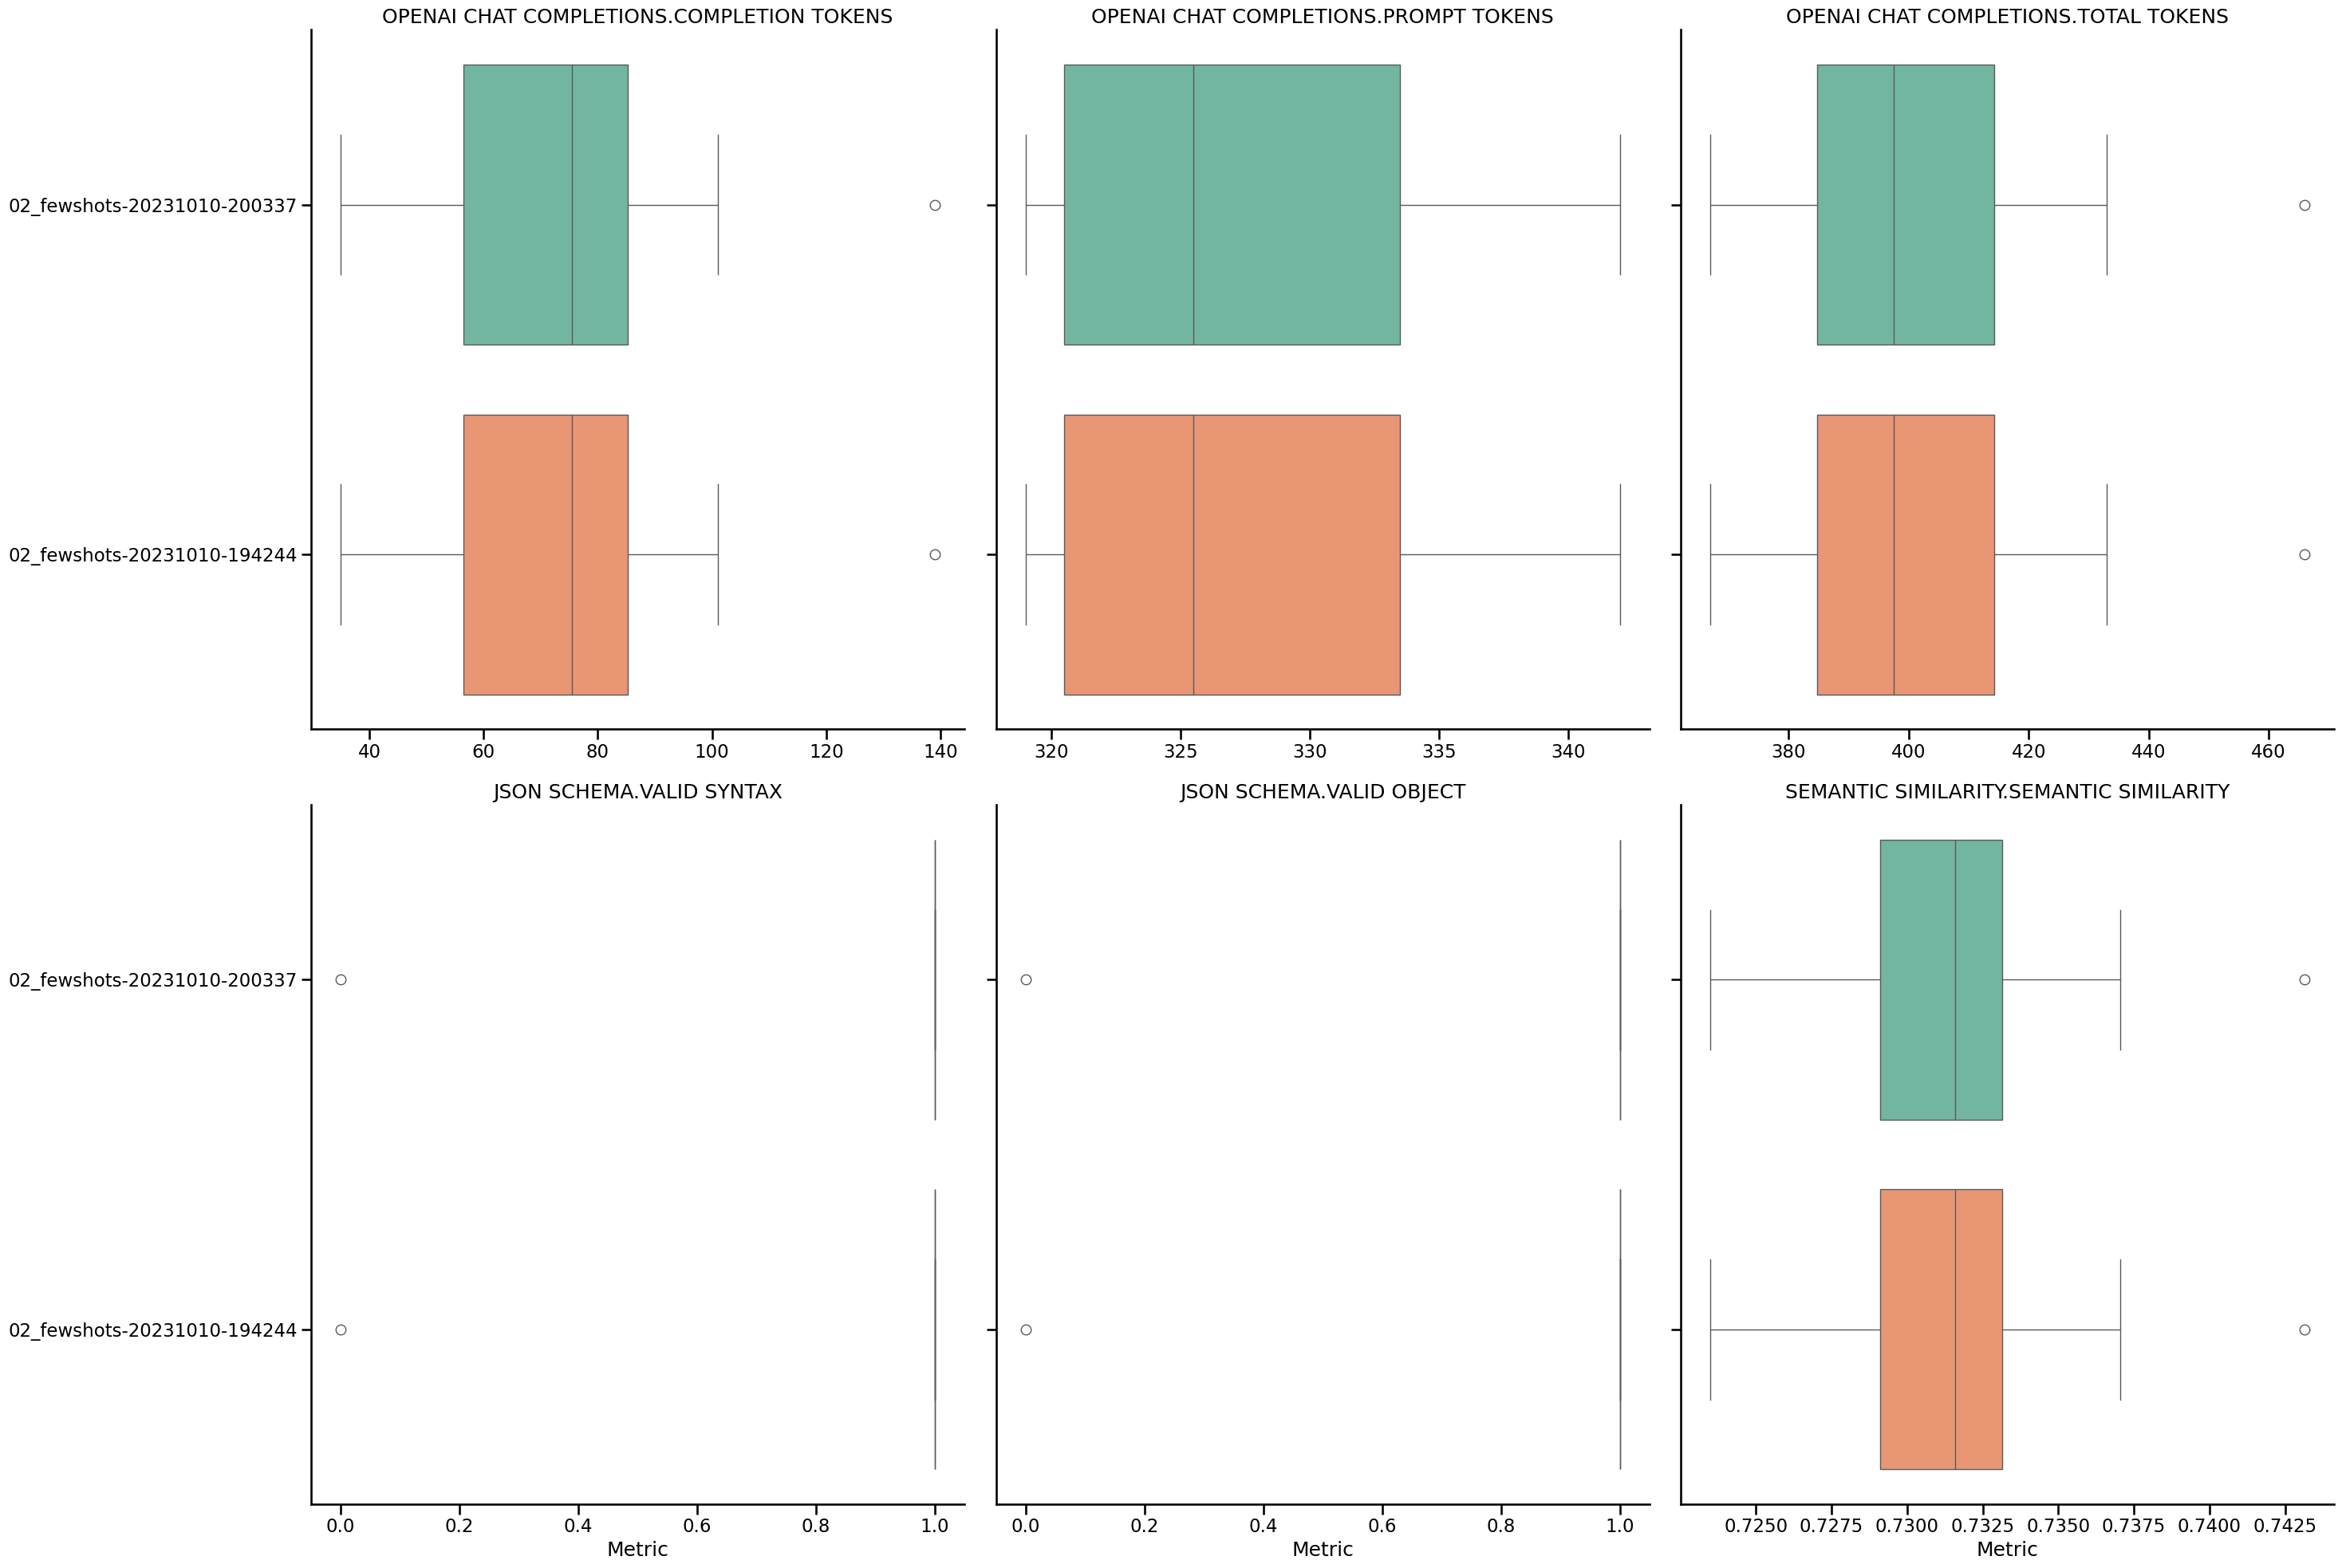

In [17]:
# plot results
plot_experiment_results(metrics_df)